# Lab 1 Problem 1
## By: Karl-Filip Selander & Davit Soselia
The MDP was formulated as according to these steps:
1) What are the states and actions? Given a pair, can I determine the probabilities of the next state? If not, there is a mistake in the formulation.

2) Given a state and an action, what are the probabilities of the next states? First try to determine which states are definitely impossible (0 probability). For the remaining ones, try to justify what the probability of each one should be, based on the problem description.

3) What are the rewards associated with the states? These should come from the problem description. Does it say that we punish the player for every step? Do we punish him for dying? Do we reward him for reaching the exit? Does it matter how much?

### MDP
In this report it is assumed that the minotaur moves 1 step in a random direction. He can not move outside of the maze, but he can move within walls.

The state space:
\begin{align}
S & = \{ (i,j,k,l) \} \\
\end{align}
where <b>i, j</b> is the position of the agent and <b>k, l</b> is the position of the minotaur.

The action space:
\begin{align}
P & = \{stay, left, right, up, down \} \\
\end{align}

Transition probabilities:
\begin{align}
P(dead|(i,j,k,l), a) & =  1 && \textrm{,if (i,j) == (k,l) }\\
P(win|win, a) & = 1 && \\
P((i_{2}, j_{2}, k_{2}, (l_{2})|(i_{1}, j_{1}, k_{1}, l_{1}), a) & = 1/N && \textrm{, where N = number of minotaur moves}\\
\end{align}

Rewards, subscript T are terminal rewards, others are nonterminal:
\begin{align}
r_{T}(dead, a) & = 0 \\
r_{T}(win, a) & = 0 \\
r(s,a) & = -100 && \textrm{if it leads to a wall}\\
r(s,a) & = 2 && \textrm{if it leads to the goal}\\
r(s,a) & = 0 && \textrm{if it is a regular step}\\
r(s,a) & = -10 && \textrm{if it leads to getting caught}\\
\end{align}

In [1]:
# Create and draw maze, initialize Maze class
import numpy as np
import temp as mz
import matplotlib.pyplot as plt
maze = np.array([[0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 1, 0, 0, 1, 0, 0], 
                 [0, 0, 1, 0, 0, 1, 1, 0],
                 [0, 0, 1, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 1, 1, 1, 0],
                 [0, 0, 0, 0, 0, 1, 2, 0]])
mz.draw_maze(maze)
# Decide wether minotaur can stay or not, 4 = no_stay, 5 = stay
env = mz.Maze(maze, minotaur_moves=4)

In [2]:
# Simulate the survival rate of 10 000 episodes 
#sr = mz.simulate_survival_rate((0,0,6,6), env, 10000, 'DynProg')

In [3]:
sr = 0.68

In [4]:
print("The survival rate after 10 000 episodes was %s percent"  % (sr*100))

The survival rate after 10 000 episodes was 68.0 percent


### Illustrate optimal policy

# Minotaur can't stay
env = mz.Maze(maze, minotaur_moves=4)
start = (0,0,6,6)
prob1 = mz.max_prob_survival(start, env, 'DynProg', 20)
print(prob1)
# Minotaur can stay
env = mz.Maze(maze, minotaur_moves=5)
start = (0,0,6,6)
prob2 = mz.max_prob_survival(start, env, 'DynProg', 20)
print(prob2)

In [5]:
prob1 = [0.8, 0.85, 0.85, 0.85, 0.8, 0.9]
prob2 = [0.8, 0.75, 0.7, 0.9, 0.85, 0.95]

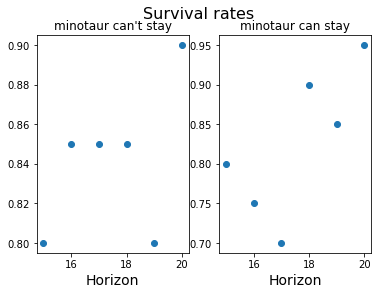

In [6]:
# Plot the maximal probability of survival as functions of the time horizon
x_axis = np.linspace(15,20,6)
plt.subplot(122)
plt.scatter(x_axis, prob2[0:6])
plt.xlabel('Horizon', fontsize=14)
plt.ylabel('Survival rate', fontsize=14)
plt.title("minotaur can stay")
plt.subplot(121)
plt.scatter(x_axis, prob1[0:6])
plt.xlabel('Horizon', fontsize=14)
plt.title("minotaur can't stay")
plt.suptitle('Survival rates', fontsize=16)
plt.show()

In [7]:
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0, 0, 6, 6);
path = env.simulate(start, policy, method);

In [8]:
print(path)

[(0, 0, 6, 6), (0, 1, 6, 6), (1, 1, 5, 6), (2, 1, 5, 5), (3, 1, 4, 5), (4, 1, 4, 6), (4, 2, 4, 5), (4, 3, 4, 5), (4, 3, 3, 5), (4, 4, 3, 4), (4, 5, 3, 4), (4, 6, 2, 4), (4, 7, 2, 5), (5, 7, 2, 4), (6, 7, 2, 4), (6, 6, 1, 4), (6, 6, 0, 4), (6, 6, 0, 5), (6, 6, 0, 6), (6, 6, 0, 7), (6, 6, 0, 7)]


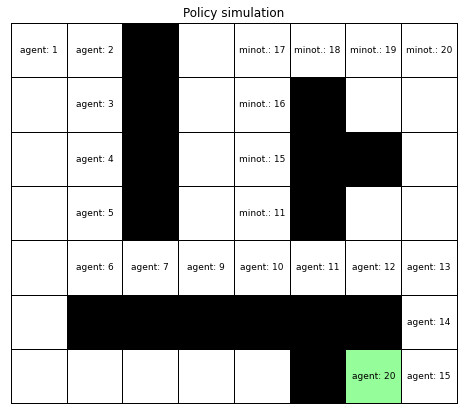

In [9]:
mz.animate_solution(maze, path)